# Анализ данных

In [1]:
import sklearn
import pandas as pd
import numpy as np

In [175]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format ='{:,.3f}'.format
%config InlineBackend.figure_format = 'svg' 

Сравним данные тренировочной и тестовой выборок.

In [179]:
train_data = pd.read_csv('data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [180]:
test_data = pd.read_csv('data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

В тренировочной и тестовой выборках, отсутствуют некоторые данные в один и тех же параметрах. Типы данных совпадают.

In [177]:
train_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,"5,943.000","7,500.000","7,500.000","7,500.000","7,500.000","7,500.000","3,419.000","7,486.000","7,500.000","7,500.000","7,500.000","5,943.000","7,500.000"
mean,"1,366,391.720",0.030,11.131,18.317,"945,153.727",0.170,34.693,0.117,"11,873,177.445","289,833.235","18,314.454","1,151.087",0.282
std,"845,339.200",0.272,4.909,7.042,"16,026,216.671",0.499,21.689,0.347,"31,926,122.975","317,871.382","11,926.765","1,604.451",0.450
min,"164,597.000",0.000,2.000,4.000,0.000,0.000,0.000,0.000,"11,242.000",0.000,0.000,585.000,0.000
25%,"844,341.000",0.000,8.000,13.500,"279,229.500",0.000,16.000,0.000,"180,169.000","114,256.500","10,067.500",711.000,0.000
50%,"1,168,386.000",0.000,10.000,17.000,"478,159.000",0.000,32.000,0.000,"309,573.000","209,323.000","16,076.500",731.000,0.000
75%,"1,640,137.000",0.000,14.000,21.800,"793,501.500",0.000,50.000,0.000,"519,882.000","360,406.250","23,818.000",743.000,1.000
max,"10,149,344.000",7.000,43.000,57.700,"1,304,726,170.000",7.000,118.000,4.000,"99,999,999.000","6,506,797.000","136,679.000","7,510.000",1.000


In [178]:
test_data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,"1,987.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","1,142.000","2,497.000","2,500.000","2,500.000","2,500.000","1,987.000"
mean,"1,366,921.676",0.035,11.184,18.326,"710,570.406",0.162,34.181,0.107,"12,155,719.633","296,396.648","18,271.340","1,234.517"
std,"917,125.151",0.386,4.853,7.255,"1,511,983.484",0.560,22.024,0.357,"32,260,973.720","378,301.966","11,543.881","1,740.219"
min,"106,533.000",0.000,1.000,3.900,0.000,0.000,0.000,0.000,"15,422.000",0.000,93.000,585.000
25%,"852,311.500",0.000,8.000,13.400,"278,586.000",0.000,16.000,0.000,"187,126.500","110,114.500","10,024.750",710.000
50%,"1,178,475.000",0.000,10.000,17.000,"478,676.000",0.000,30.000,0.000,"322,366.000","207,385.000","16,642.500",731.000
75%,"1,629,734.500",0.000,14.000,22.100,"802,598.500",0.000,50.000,0.000,"522,582.500","366,348.500","24,146.000",743.000
max,"14,975,610.000",15.000,48.000,53.400,"54,484,386.000",15.000,82.000,5.000,"99,999,999.000","6,030,087.000","93,555.000","7,480.000"


In [7]:
train_data.describe(include=['object', 'bool'])

,Home Ownership,Years in current job,Purpose,Term
count,7500,7129,7500,7500
unique,4,11,15,2
top,Home Mortgage,10+ years,debt consolidation,Short Term
freq,3637,2332,5944,5556


In [181]:
test_data.describe(include=['object', 'bool'])

,Home Ownership,Years in current job,Purpose,Term
count,2500,2414,2500,2500
unique,4,11,14,2
top,Home Mortgage,10+ years,debt consolidation,Short Term
freq,1225,810,1973,1861


In [ ]:
Параметры распределений сильно не отличаются. Лишь параметр Maximum Open Credit в тренировочных данных имеет на порядки превышающие значения.

<AxesSubplot:>

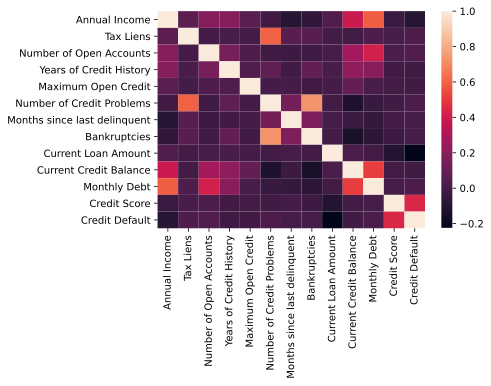

In [182]:
sns.heatmap(train_data.corr())

<AxesSubplot:>

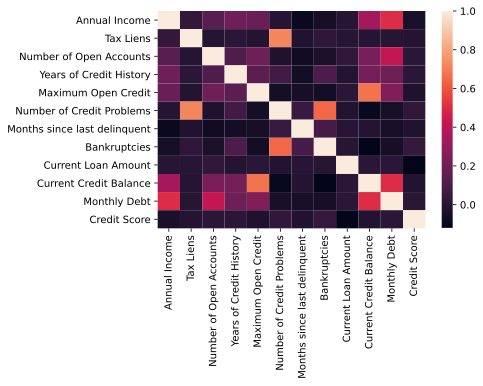

In [183]:
sns.heatmap(test_data.corr())

Карта корреляции примерно одинакова. На тренировочных данных сильно коррелирует Current Credit Balance и Maximum Open Credit, но это возможно просто особенность выборки.

Так как свойства выборок примерно одинаковы, в дальнейшем анализе в основном будем использовать тренировочные данные.

## Home Ownership

Качественные данные.

In [186]:
train_data['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [185]:
pd.crosstab(train_data['Home Ownership'], train_data['Credit Default'], normalize=False)

Credit Default,0,1
Home Ownership,,
Have Mortgage,10,2
Home Mortgage,2721,916
Own Home,455,192
Rent,2201,1003


Эти данные достаточно просто закодировать.

In [188]:
train_data_prepared = pd.get_dummies(train_data['Home Ownership'], prefix='ho', columns = ['Home Ownership'], drop_first=False)
train_data_prepared

,ho_Have Mortgage,ho_Home Mortgage,ho_Own Home,ho_Rent
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
7495,0,0,0,1
7496,0,1,0,0
7497,0,0,0,1
7498,0,1,0,0


## Annual Income (Годовой доход)

Annual Income - годовой доход, не коррелирует с другими параметрами. 

In [9]:
train_data['Annual Income'].describe()

count        5,943.000
mean     1,366,391.720
std        845,339.200
min        164,597.000
25%        844,341.000
50%      1,168,386.000
75%      1,640,137.000
max     10,149,344.000
Name: Annual Income, dtype: float64

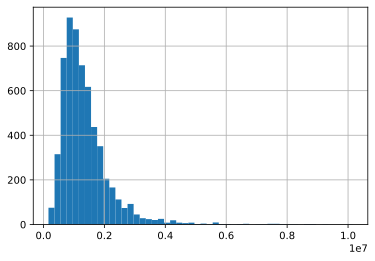

In [154]:
fig = train_data['Annual Income'].hist(bins=50).get_figure()

Распределение похоже на логарифмическое. Для нормализации можно применить преобразование Бокса-Кокса.
Недостающие данные можно заменить средним, медианой или очень большим числом(для алгоритмов основанных на деревьях).

In [156]:
train_data_prepared['Annual Income'].describe()

count        7,500.000
mean     1,366,391.720
std        752,481.202
min        164,597.000
25%        931,133.000
50%      1,366,391.720
75%      1,499,974.000
max     10,149,344.000
Name: Annual Income, dtype: float64

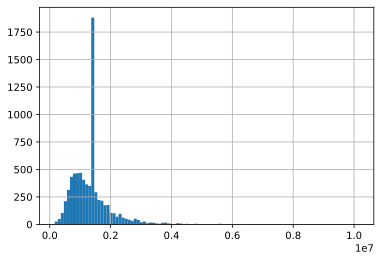

In [157]:
fig = train_data_prepared['Annual Income'].hist(bins=100).get_figure()

<AxesSubplot:>

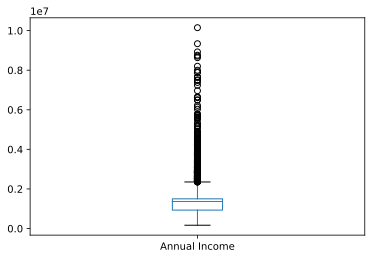

In [159]:
train_data_prepared['Annual Income'].plot(kind='box')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

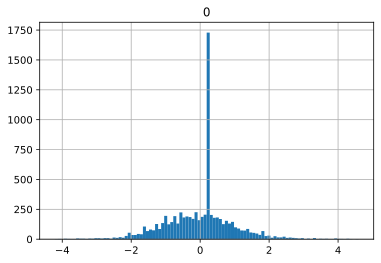

In [161]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
trans = pd.DataFrame(pt.fit_transform(np.array(train_data_prepared['Annual Income']).reshape(-1, 1)))
trans.hist(bins=100)

<AxesSubplot:>

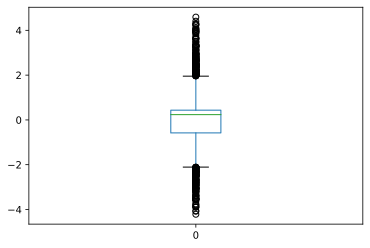

In [162]:
trans.plot(kind='box')

In [167]:
ss = preprocessing.StandardScaler()
standart = ss.fit_transform(np.array(trans).reshape(-1, 1))

<AxesSubplot:>

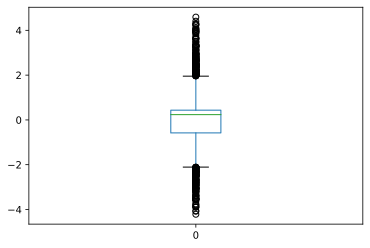

In [168]:
trans.plot(kind='box')

## Years in current job

Особо не влияет на таргет. К тому же любой человек мог поменять работу недавно.
Нан может означать отсутствие данных либо человек вообще без работы.

<AxesSubplot:xlabel='Years in current job'>

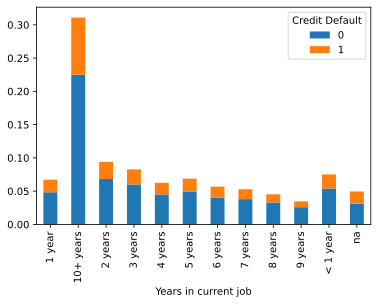

In [48]:
pd.crosstab(train_data['Years in current job'].fillna('na'), train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

Распределение отличается от остальных, значит можно предположить. Что человек безработный. Установим значение 0. 
Значения меньше одного года установим в 0.5

In [28]:
train_data['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [149]:
transform_dict = {'< 1 year':0.5, '10+ years':10, '2 years':2, '3 years':3, '5 years':5, '1 year':1, '4 years':4, '6 years':6, '7 years':7, '8 years':8, '9 years':9}

train_data_prepared['Years in current job'] = train_data['Years in current job'].replace(transform_dict, None)
train_data_prepared['Years in current job'] = train_data_prepared['Years in current job'].fillna(0)

<AxesSubplot:xlabel='Years in current job'>

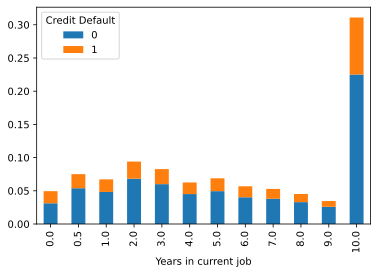

In [30]:
pd.crosstab(train_data_prepared['Years in current job'], train_data_prepared['Credit Default'], normalize=True).plot(kind='bar', stacked=True)

In [51]:
train_data_prepared['Years in current job'].describe()

count   7,500.000
mean        5.627
std         3.699
min         0.000
25%         2.000
50%         6.000
75%        10.000
max        10.000
Name: Years in current job, dtype: float64

<AxesSubplot:>

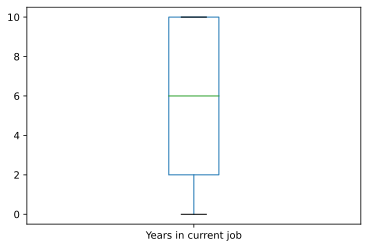

In [52]:
train_data_prepared['Years in current job'].plot(kind='box')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

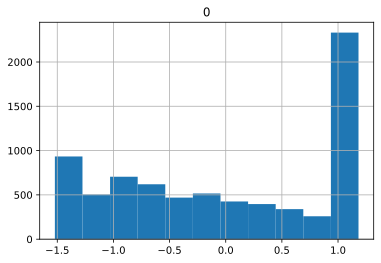

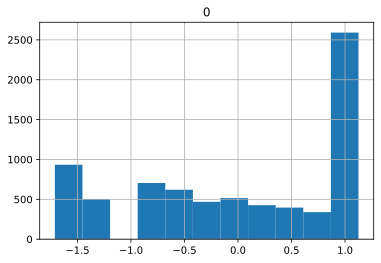

In [153]:
scaler = preprocessing.StandardScaler().fit(np.array(train_data_prepared['Years in current job']).reshape(-1, 1))
scaled_df = pd.DataFrame(scaler.transform(np.array(train_data_prepared['Years in current job']).reshape(-1, 1)))
scaled_df.hist(bins=11)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
trans = pd.DataFrame(pt.fit_transform(np.array(train_data_prepared['Years in current job']).reshape(-1, 1)))
trans.hist(bins=11)

## Tax Liens (Залог, количество)

Слабо коррелирует с (Number of Credit Problems - количество проблем с кредитом)

In [31]:
train_data['Tax Liens'].describe()

count   7,500.000
mean        0.030
std         0.272
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         7.000
Name: Tax Liens, dtype: float64

<AxesSubplot:xlabel='Tax Liens'>

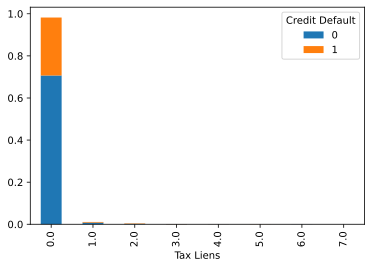

In [32]:
pd.crosstab(train_data['Tax Liens'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

<AxesSubplot:>

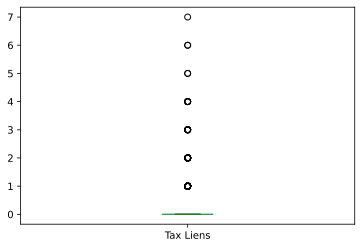

In [35]:
train_data_prepared['Tax Liens'].plot(kind='box')

In [55]:
binarized = train_data_prepared['Tax Liens'].apply(lambda x: 0 if x == 0 else 1)
binarized.value_counts()

## Number of Open Accounts (Количество открытых счетов)

In [60]:
train_data['Number of Open Accounts'].describe()

count   7,500.000
mean       11.131
std         4.909
min         2.000
25%         8.000
50%        10.000
75%        14.000
max        43.000
Name: Number of Open Accounts, dtype: float64

<AxesSubplot:xlabel='Number of Open Accounts'>

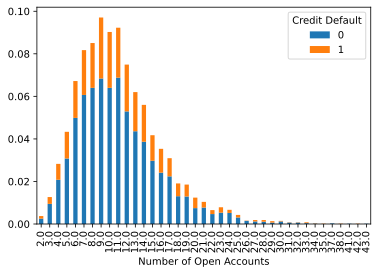

In [61]:
pd.crosstab(train_data['Number of Open Accounts'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

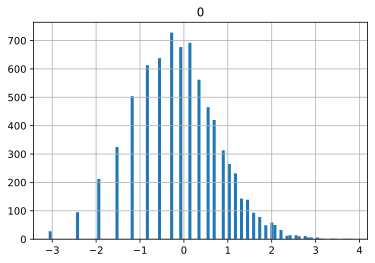

In [62]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
trans = pd.DataFrame(pt.fit_transform(np.array(train_data_prepared['Number of Open Accounts']).reshape(-1, 1)))
trans.hist(bins=100)

<AxesSubplot:>

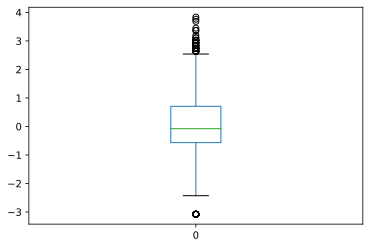

In [63]:
trans.plot(kind='box')

## Years of Credit History (Количество лет кредитной истории)

In [64]:
train_data['Years of Credit History'].describe()

count   7,500.000
mean       18.317
std         7.042
min         4.000
25%        13.500
50%        17.000
75%        21.800
max        57.700
Name: Years of Credit History, dtype: float64

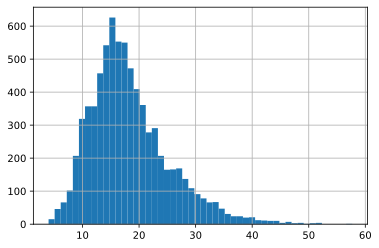

In [66]:
fig = train_data['Years of Credit History'].hist(bins=50).get_figure()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

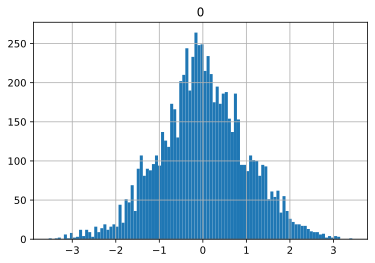

In [67]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
trans = pd.DataFrame(pt.fit_transform(np.array(train_data_prepared['Years of Credit History']).reshape(-1, 1)))
trans.hist(bins=100)

## Maximum Open Credit (Наибольший открытый кредит)

In [68]:
train_data['Maximum Open Credit'].describe()

count           7,500.000
mean          945,153.727
std        16,026,216.671
min                 0.000
25%           279,229.500
50%           478,159.000
75%           793,501.500
max     1,304,726,170.000
Name: Maximum Open Credit, dtype: float64

In [145]:
test_data['Maximum Open Credit'].describe()

count        2,500.000
mean       710,570.406
std      1,511,983.484
min              0.000
25%        278,586.000
50%        478,676.000
75%        802,598.500
max     54,484,386.000
Name: Maximum Open Credit, dtype: float64

<AxesSubplot:>

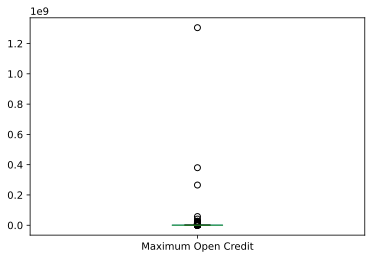

In [71]:
train_data['Maximum Open Credit'].plot(kind='box')

In [172]:
threshold = 100000000
train_data_prepared['Maximum Open Credit'] = train_data['Maximum Open Credit'].apply(lambda x: threshold if x> threshold else x)

<AxesSubplot:>

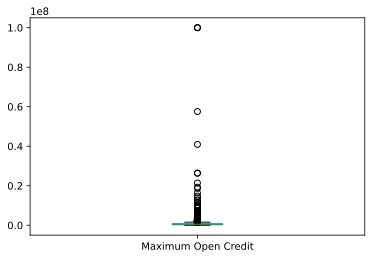

In [173]:
train_data_prepared['Maximum Open Credit'].plot(kind='box')

<AxesSubplot:>

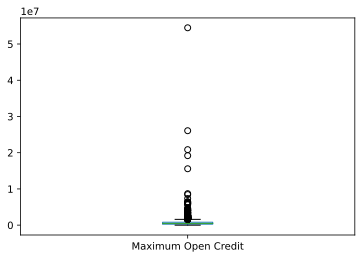

In [144]:
test_data['Maximum Open Credit'].plot(kind='box')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

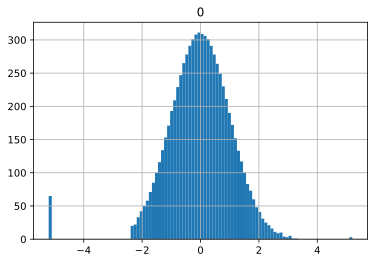

In [174]:
#pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
#trans = pd.DataFrame(pt.fit_transform(np.array(train_data_prepared['Maximum Open Credit']).reshape(-1, 1)))
#trans.hist(bins=100)
qt = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
trans = pd.DataFrame(qt.fit_transform(np.array(train_data_prepared['Maximum Open Credit']).reshape(-1, 1)))
trans.hist(bins=100)

<AxesSubplot:>

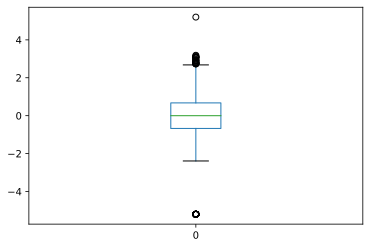

In [85]:
trans.plot(kind='box')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

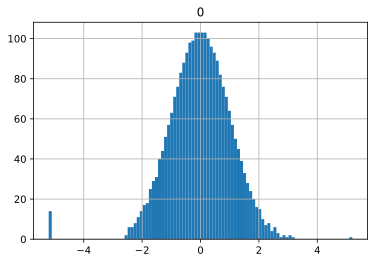

In [146]:
qt = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
trans = pd.DataFrame(qt.fit_transform(np.array(test_data['Maximum Open Credit']).reshape(-1, 1)))
trans.hist(bins=100)

<AxesSubplot:>

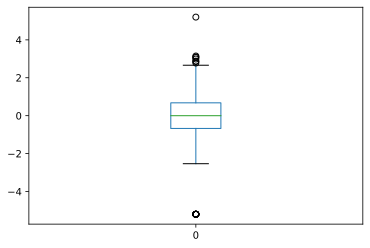

In [147]:
trans.plot(kind='box')

## Number of Credit Problems (Количество проблем с кредитом)

In [78]:
train_data['Number of Credit Problems'].describe()

count   7,500.000
mean        0.170
std         0.499
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         7.000
Name: Number of Credit Problems, dtype: float64

<AxesSubplot:xlabel='Number of Credit Problems'>

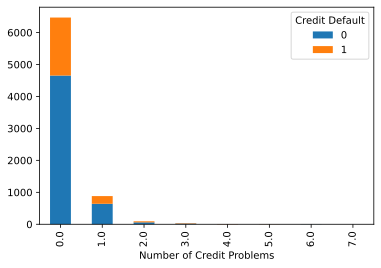

In [82]:
pd.crosstab(train_data['Number of Credit Problems'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

Коррелирует с (Bankruptcies - банкротства) и слабо коррелирует с (Tax Liens - залог)
Возможно необходимо сделать (есть - нет)

In [81]:
binarized = train_data_prepared['Number of Credit Problems'].apply(lambda x: 0 if x == 0 else 1)
binarized.value_counts()

0    6469
1    1031
Name: Number of Credit Problems, dtype: int64

## Months since last delinquent (Количество месяцев с последней просрочки платежа)

In [77]:
train_data['Months since last delinquent'].describe()

count   3,419.000
mean       34.693
std        21.689
min         0.000
25%        16.000
50%        32.000
75%        50.000
max       118.000
Name: Months since last delinquent, dtype: float64

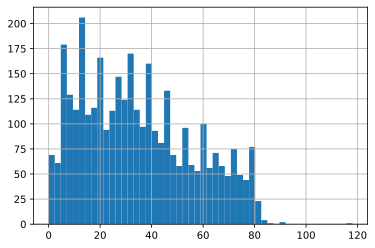

In [86]:
fig = train_data['Months since last delinquent'].hist(bins=50).get_figure()

In [79]:
train_data_prepared['Months since last delinquent'] = train_data['Months since last delinquent'].fillna(500)

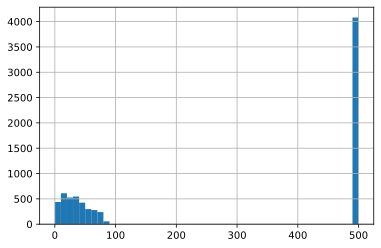

In [80]:
fig = train_data_prepared['Months since last delinquent'].hist(bins=50).get_figure()

<AxesSubplot:xlabel='Months since last delinquent'>

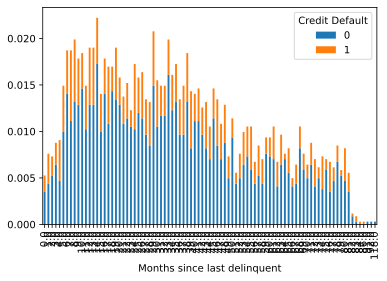

In [82]:
pd.crosstab(train_data['Months since last delinquent'], train_data['Credit Default'], dropna=False, normalize=True).plot(kind='bar', stacked=True)

Самый сложный параметр. Без него пока.

## Bankruptcies (Банкротства)

In [88]:
train_data['Bankruptcies'].value_counts()

0.000    6660
1.000     786
2.000      31
3.000       7
4.000       2
Name: Bankruptcies, dtype: int64

<AxesSubplot:xlabel='Bankruptcies'>

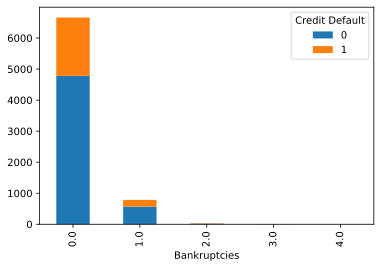

In [87]:
pd.crosstab(train_data['Bankruptcies'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

Возможно необходимо сделать (есть - нет)

Хорошо коррелирует с Number of Credit Problems (Количество проблем с кредитом). Заполним недостающие значения. Опираясь на данные этого парраметра. Если 0 - ставим 0. Иначе 1.


In [94]:
train_data_prepared['Bankruptcies'] = train_data['Bankruptcies'].fillna(train_data['Number of Credit Problems'].apply(lambda x: 0 if (x == 0) else 1)) 

In [95]:
train_data_prepared['Bankruptcies'].value_counts()

0.000    6674
1.000     786
2.000      31
3.000       7
4.000       2
Name: Bankruptcies, dtype: int64

In [97]:
binarized = train_data_prepared['Bankruptcies'].apply(lambda x: 0 if x == 0 else 1)
binarized.value_counts()

0    6674
1     826
Name: Bankruptcies, dtype: int64

In [98]:
train_data['Purpose'].describe()

count                   7500
unique                    15
top       debt consolidation
freq                    5944
Name: Purpose, dtype: object

## Purpose (Цель кредита)

<AxesSubplot:xlabel='Purpose'>

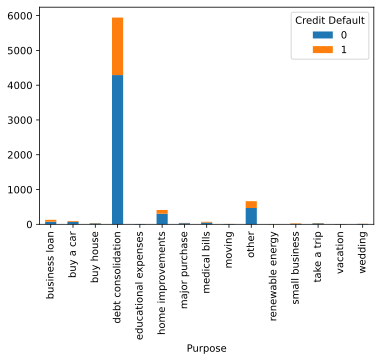

In [99]:
pd.crosstab(train_data['Purpose'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

In [100]:
train_data_prepared = pd.get_dummies(train_data, prefix=['p_'], columns = ['Purpose'], drop_first=False)
train_data_prepared

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,p__home improvements,p__major purchase,p__medical bills,p__moving,p__other,p__renewable energy,p__small business,p__take a trip,p__vacation,p__wedding
0,Own Home,"482,087.000",NaN,0.000,11.000,26.300,"685,960.000",1.000,NaN,1.000,...,0,0,0,0,0,0,0,0,0,0
1,Own Home,"1,025,487.000",10+ years,0.000,15.000,15.300,"1,181,730.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
2,Home Mortgage,"751,412.000",8 years,0.000,11.000,35.000,"1,182,434.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
3,Own Home,"805,068.000",6 years,0.000,8.000,22.500,"147,400.000",1.000,NaN,1.000,...,0,0,0,0,0,0,0,0,0,0
4,Rent,"776,264.000",8 years,0.000,13.000,13.600,"385,836.000",1.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,"402,192.000",< 1 year,0.000,3.000,8.500,"107,866.000",0.000,NaN,0.000,...,0,0,0,0,1,0,0,0,0,0
7496,Home Mortgage,"1,533,984.000",1 year,0.000,10.000,26.500,"686,312.000",0.000,43.000,0.000,...,0,0,0,0,0,0,0,0,0,0
7497,Rent,"1,878,910.000",6 years,0.000,12.000,32.100,"1,778,920.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
7498,Home Mortgage,NaN,NaN,0.000,21.000,26.500,"1,141,250.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0


## Term (Cрок кредита)

In [101]:
train_data['Term'].describe()

count           7500
unique             2
top       Short Term
freq            5556
Name: Term, dtype: object

<AxesSubplot:xlabel='Term'>

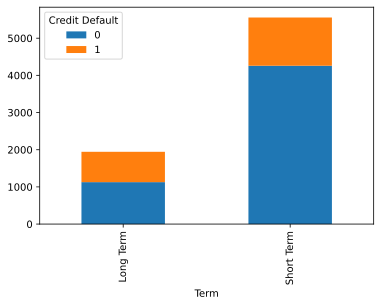

In [102]:
pd.crosstab(train_data['Term'], train_data['Credit Default'], dropna=False, normalize=False).plot(kind='bar', stacked=True)

In [103]:
transform_dict = {'Long Term':0, 'Short Term':1}

train_data_prepared['Term'] = train_data['Term'].replace(transform_dict, None)
train_data_prepared

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,p__home improvements,p__major purchase,p__medical bills,p__moving,p__other,p__renewable energy,p__small business,p__take a trip,p__vacation,p__wedding
0,Own Home,"482,087.000",NaN,0.000,11.000,26.300,"685,960.000",1.000,NaN,1.000,...,0,0,0,0,0,0,0,0,0,0
1,Own Home,"1,025,487.000",10+ years,0.000,15.000,15.300,"1,181,730.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
2,Home Mortgage,"751,412.000",8 years,0.000,11.000,35.000,"1,182,434.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
3,Own Home,"805,068.000",6 years,0.000,8.000,22.500,"147,400.000",1.000,NaN,1.000,...,0,0,0,0,0,0,0,0,0,0
4,Rent,"776,264.000",8 years,0.000,13.000,13.600,"385,836.000",1.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,"402,192.000",< 1 year,0.000,3.000,8.500,"107,866.000",0.000,NaN,0.000,...,0,0,0,0,1,0,0,0,0,0
7496,Home Mortgage,"1,533,984.000",1 year,0.000,10.000,26.500,"686,312.000",0.000,43.000,0.000,...,0,0,0,0,0,0,0,0,0,0
7497,Rent,"1,878,910.000",6 years,0.000,12.000,32.100,"1,778,920.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0
7498,Home Mortgage,NaN,NaN,0.000,21.000,26.500,"1,141,250.000",0.000,NaN,0.000,...,0,0,0,0,0,0,0,0,0,0


## Current Loan Amount (Текущая сумма кредита)

In [104]:
train_data['Current Loan Amount'].describe()

count        7,500.000
mean    11,873,177.445
std     31,926,122.975
min         11,242.000
25%        180,169.000
50%        309,573.000
75%        519,882.000
max     99,999,999.000
Name: Current Loan Amount, dtype: float64

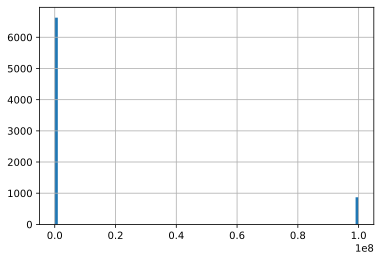

In [105]:
fig = train_data['Current Loan Amount'].hist(bins=100).get_figure()

Скорее всего значние 99999999 ошибочно. Укажем его как недостающие.

In [106]:
current_loan_amount_nan = train_data['Current Loan Amount'].replace(99999999, np.nan)

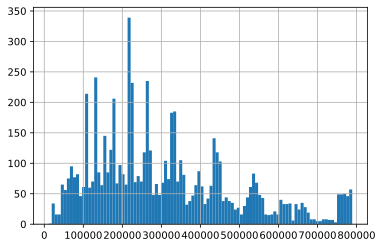

In [107]:
fig = current_loan_amount_nan.hist(bins=100).get_figure()

In [39]:
current_loan_amount_nan.describe()

count     6,630.000
mean    309,024.390
std     182,294.009
min      11,242.000
25%     172,744.000
50%     265,826.000
75%     430,100.000
max     789,030.000
Name: Current Loan Amount, dtype: float64

Ни с одним значением сильно не коррелирует.

In [110]:
train_data_prepared['Current Loan Amount'] = current_loan_amount_nan.fillna(current_loan_amount_nan.mean())

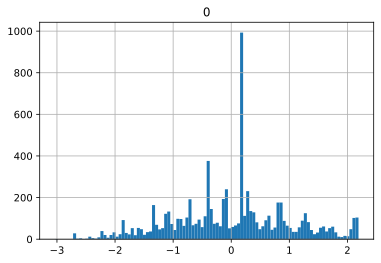

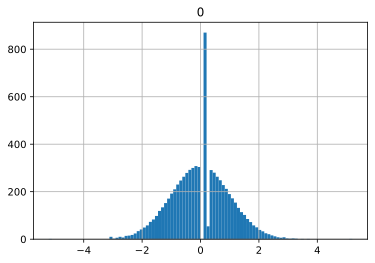

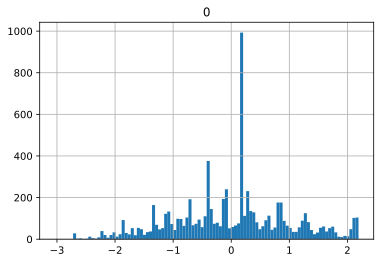

In [140]:
def show_preprocessing(parametr):
    #train_data_prepared[parametr].hist(bins=100)
    pt_bc = preprocessing.PowerTransformer(method='box-cox', standardize=True)
    trans_bc = pd.DataFrame(pt_bc.fit_transform(np.array(train_data_prepared[parametr]).reshape(-1, 1)))
    trans_bc.hist(bins=100)
    qt = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
    trans = pd.DataFrame(qt.fit_transform(np.array(train_data_prepared[parametr]).reshape(-1, 1)))
    trans.hist(bins=100)
    pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
    trans = pd.DataFrame(pt.fit_transform(np.array(train_data_prepared[parametr]).reshape(-1, 1)))
    trans.hist(bins=100)
show_preprocessing('Current Loan Amount')

# Current Credit Balance (Текущий кредитный баланс)

In [60]:
train_data['Current Credit Balance'].describe()

count       7,500.000
mean      289,833.235
std       317,871.382
min             0.000
25%       114,256.500
50%       209,323.000
75%       360,406.250
max     6,506,797.000
Name: Current Credit Balance, dtype: float64

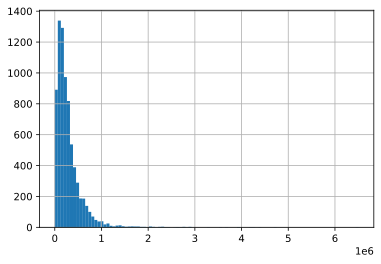

In [123]:
fig = train_data['Current Credit Balance'].hist(bins=100).get_figure()

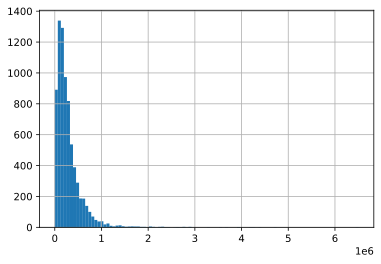

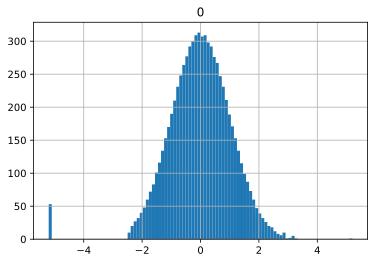

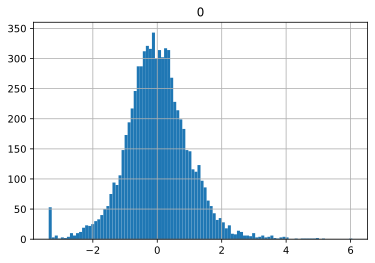

In [131]:
show_preprocessing('Current Credit Balance')

# Monthly Debt - ежемесячный долг

In [62]:
train_data['Monthly Debt'].describe()

count     7,500.000
mean     18,314.454
std      11,926.765
min           0.000
25%      10,067.500
50%      16,076.500
75%      23,818.000
max     136,679.000
Name: Monthly Debt, dtype: float64

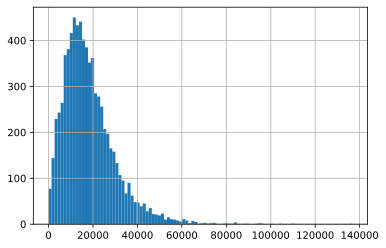

In [132]:
fig = train_data['Monthly Debt'].hist(bins=100).get_figure()

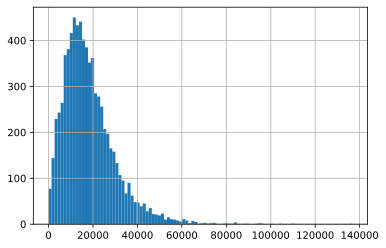

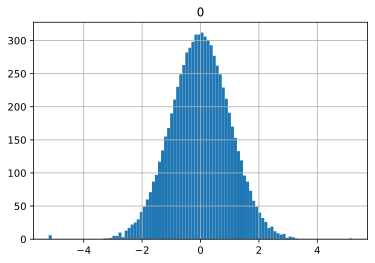

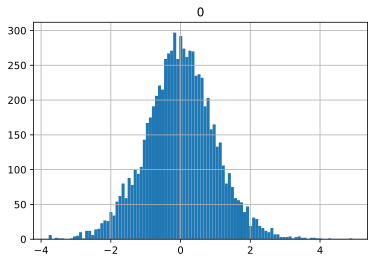

In [133]:
show_preprocessing('Monthly Debt')

# Credit Score - кредитный рейтинг

In [64]:
train_data['Credit Score'].describe()

count   5,943.000
mean    1,151.087
std     1,604.451
min       585.000
25%       711.000
50%       731.000
75%       743.000
max     7,510.000
Name: Credit Score, dtype: float64

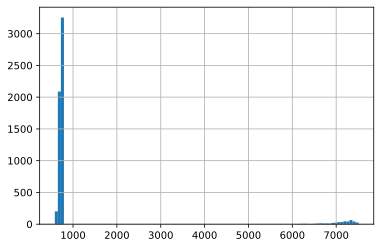

In [134]:
fig = train_data['Credit Score'].hist(bins=100).get_figure()

In [71]:
train_data['Credit Score'].value_counts()

740.000      169
747.000      168
748.000      157
745.000      152
742.000      151
            ... 
629.000        1
606.000        1
6,830.000      1
6,670.000      1
620.000        1
Name: Credit Score, Length: 268, dtype: int64

Скорее всего лишний ноль.

In [135]:
train_data_prepared['Credit Score'] = train_data['Credit Score'].apply(lambda x: x/10 if x>1000 else x)

In [136]:
train_data_prepared['Credit Score'].describe()

count   5,943.000
mean      720.087
std        27.957
min       585.000
25%       708.000
50%       729.000
75%       740.000
max       751.000
Name: Credit Score, dtype: float64

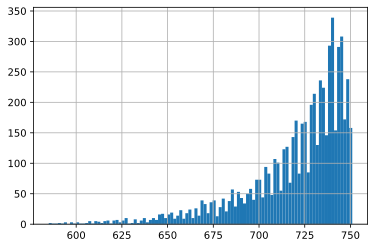

In [137]:
fig = train_data_prepared['Credit Score'].hist(bins=100).get_figure()

In [138]:
train_data_prepared['Credit Score'] = train_data_prepared['Credit Score'].fillna(train_data_prepared['Credit Score'].mean())

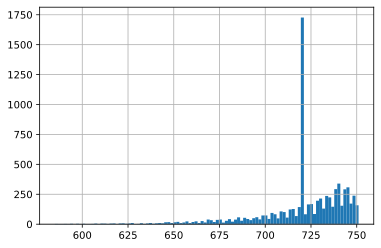

In [139]:
fig = train_data_prepared['Credit Score'].hist(bins=100).get_figure()

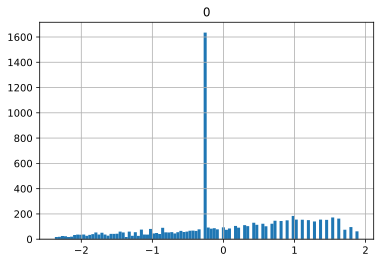

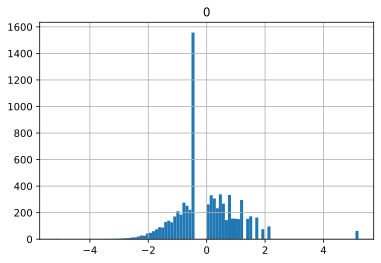

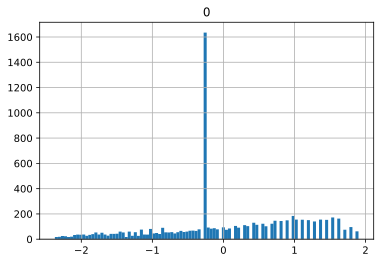

In [141]:
show_preprocessing('Credit Score')

# Заметки

In [20]:
train_data.isna().sum(axis=0)

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Борьба с выбросами. стандартизация. Oversampling попробовать. Добавить тестовае данные для анализа параметров.